<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/project/1_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 살펴보기

In [3]:
!pip install xlrd==1.2.0

In [9]:
df = pd.read_excel('/content/drive/MyDrive/이어드림/toy_project_boston/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

#### 데이터 타입 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


#### 결측값 확인

In [6]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

## 데이터 분포 확인하기

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


> 타겟 값인 주택가격의 밀도 차트를 그리면 아래와 같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


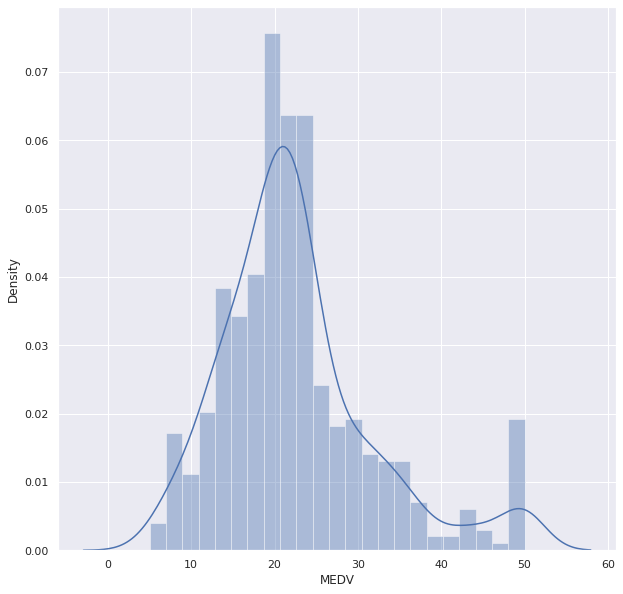

In [230]:
plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(12, 5)})
sns.distplot(df['MEDV'])
plt.show()

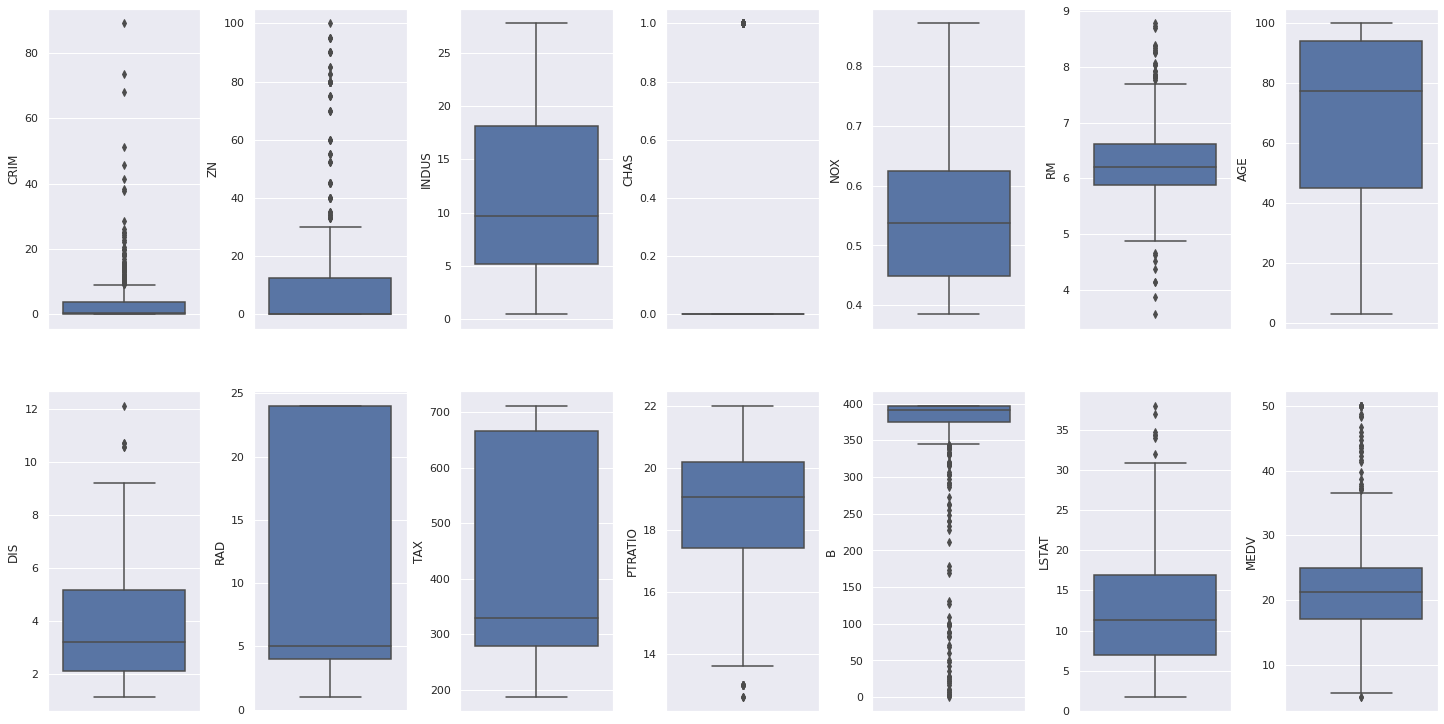

In [224]:
# kaggle 원문 코드.. 이상치 확인
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))# axs subplot 들의 위치 조정
index = 0
axs = axs.flatten()
for k,v in df.iloc[:,:14].items():
    sns.boxplot(y=k, data=df, ax=axs[index]) # 
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### 상관계수 분석

In [225]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


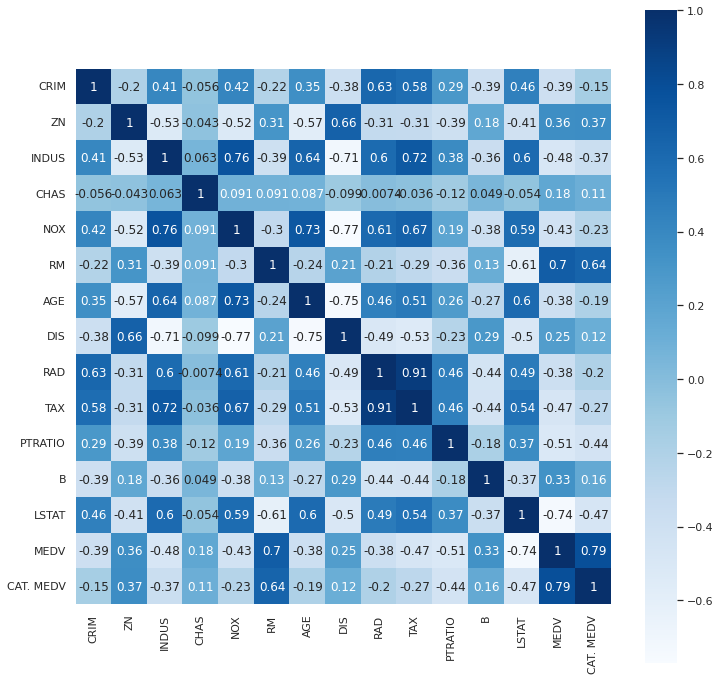

In [226]:
plt.figure(figsize=(12,12))
sns.heatmap(data=corr,square=True,cmap="Blues",annot=True)
plt.show()

In [29]:
# 집값 데이터 상관관계
corr['MEDV'].sort_values()

LSTAT       -0.737663
PTRATIO     -0.507787
INDUS       -0.483725
TAX         -0.468536
NOX         -0.427321
CRIM        -0.388305
RAD         -0.381626
AGE         -0.376955
CHAS         0.175260
DIS          0.249929
B            0.333461
ZN           0.360445
RM           0.695360
CAT. MEDV    0.789789
MEDV         1.000000
Name: MEDV, dtype: float64

> 양의 상관관계 : CHAS(찰스강뷰), DIS(직업센터까지 접근성), B(흑인 비율), ZN(거주지역 비율), RM(방의 수)  
음의 상관관계 : LSTAT(하위 계층 비율), PTRATIO(학생-교사비율), INDUS(비소매상업지역 비율), TAX(제산세율), NOX(일산화질소 농도), CRIM(1인당 범죄율), RAD(고속도로까지 접근성), AGE(건축년도 비율)  
- 단순 상관관계 분석에 따르면 집값과 가장 밀접한 관계성을 가진 특성은 LSTAT(하위 계층 비율)이다.  
- 그 뒤를 이어 RM(방의 수), PTRATIO(학생-교사 비율), INDUS(비소매상업지역 면적 비율), TAX(재산세율)이 뒤따랐다.

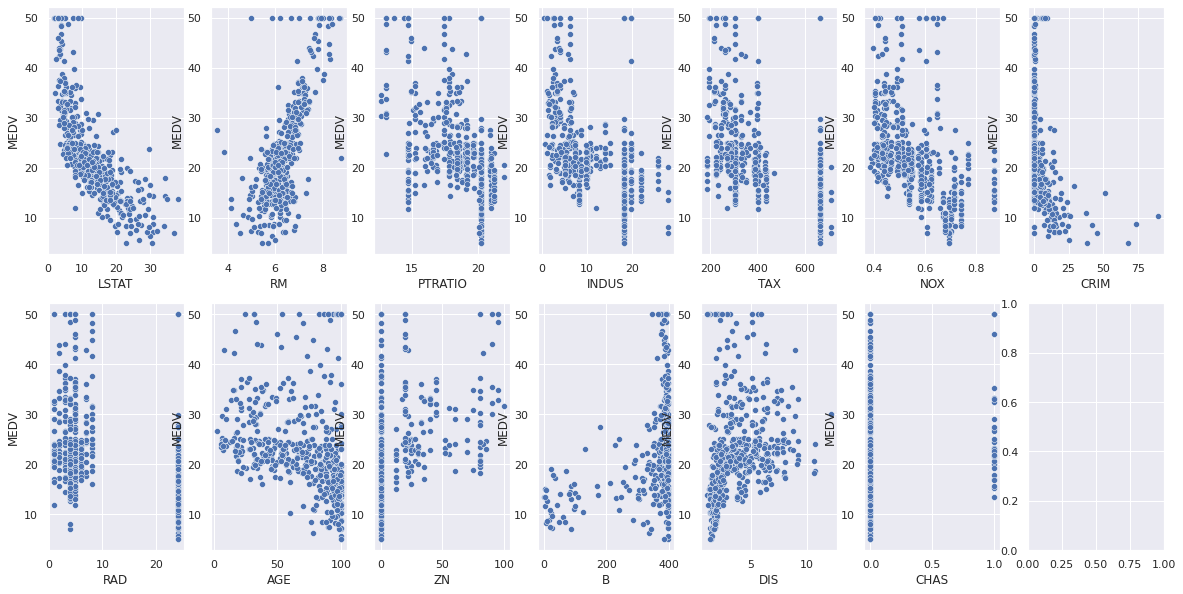

In [221]:
abscor = abs(corr['MEDV']).sort_values(ascending=False)[2:]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()
index = 0
for i in abscor.index:
    sns.scatterplot(data=df, x=i, y="MEDV", ax= axs[index])
    index +=1
plt.show()

## 주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

#### 대형 평수 VS 소형 평수

가정 
> 주택의 크기는 주택 가격과 상대적으로 높은 상관관계(0.360445) 가 있을 것이다.  
> ZN 특성 값을 주택의 크기와 연관지어 특성분석을 실시한다. 즉 ZN 이 클수록 주택의 크기도 클 것이라고 가정한다.



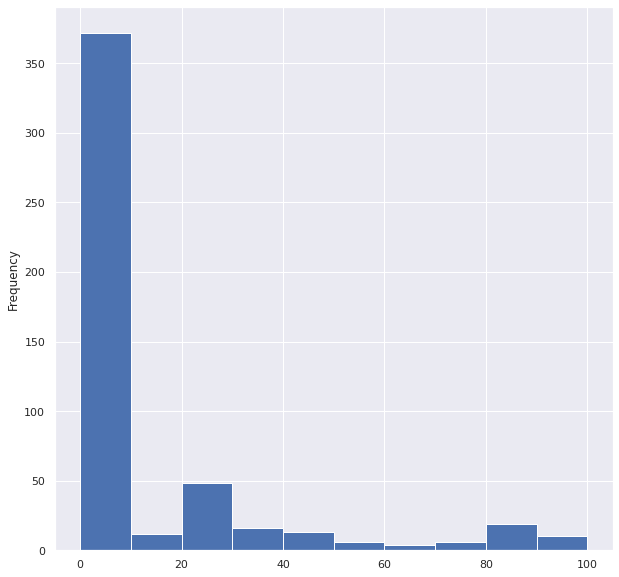

In [231]:
plt.figure(figsize=(10,10))
df['ZN'].plot.hist()
plt.show()

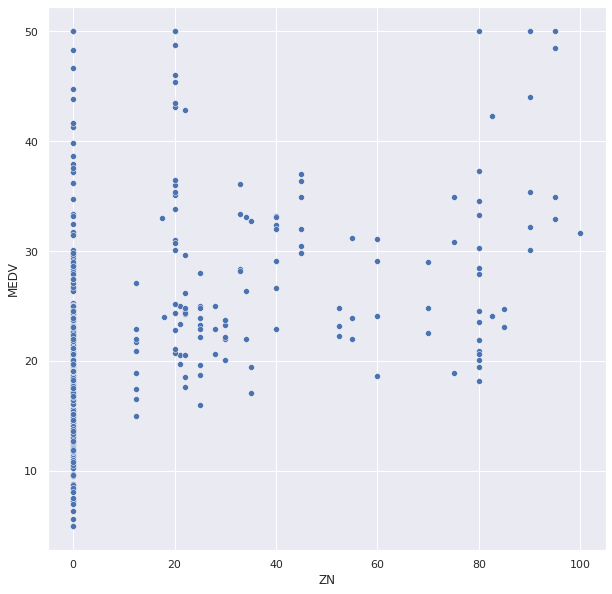

In [232]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='ZN',y='MEDV')
plt.show()

> 특성 'ZN'의 값이 25,000sq.ft 이상 일때 0보다 커지게 됨으로 아래와 같이 가정한다.

> 특성 'ZN'이 0인 값을 작은 주택인 'small'이라 명명하고,  
특성 'ZN'이 0보다 큰 값을 큰 주택인 'big'이라고 명명한다.

In [237]:
def func(x):
    if x ==0:
        return "small"
    elif x > 0:
        return "big"
df['SIZE'] = df['ZN'].map(func)

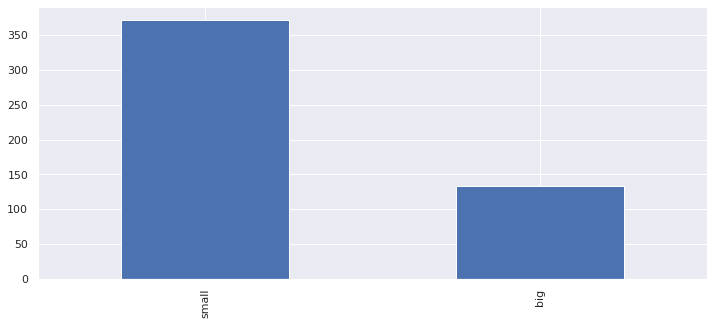

In [241]:
df['SIZE'].value_counts().plot.bar()

> 보스턴 내에 3만 달러 이상의 고급 주택 수 중 SIZE가 큰 주택의 비율을 구한다.

In [242]:
exp = df['CAT. MEDV'].value_counts()# 3만 달러 이상의 고급 주택 수 -> 84채

In [243]:
how = {
    "CAT. MEDV": sum
}
size_exp = df.groupby("SIZE").agg(how) # 3만 달러 이상의 고급 주택 중 25,000sq,ft 넘는 큰 주택 수 
size_exp.loc['big']# 51채

CAT. MEDV    51
Name: big, dtype: int64

> 고급 주택 중 넓이가 큰 주택 비율

In [244]:
# 비싼 주택 중 넓이가 큰 주택 비율
size_exp.loc['big']/exp[1]

CAT. MEDV    0.607143
Name: big, dtype: float64

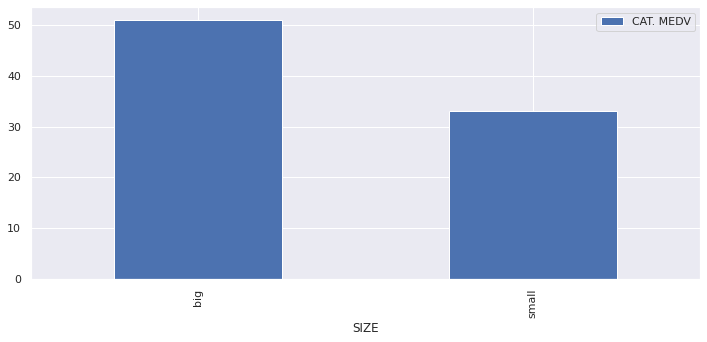

In [245]:
size_exp.plot.bar()

#### 결론

> 주택의 크기가 작음에도 가격이 높은 주택들이 많아서, 주택 크기와 주택 가격에 강한 양의 상관관계가 있다고 보기는 어렵다고 판단된다.  
하지만 가격이 높은 고급 주택 중에는 큰 주택의 비중이 더 높았다는 점을 특기할만하다.


#### 노후화 정도와 집값의 관계는?

In [123]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,SIZE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,big
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,small
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,small
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,small
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,small
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,small
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,small
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,small


In [127]:
# 노후화 정도와 집값은 음의 상관관계가 있다.
corr['AGE']['MEDV']

-0.3769545650045961

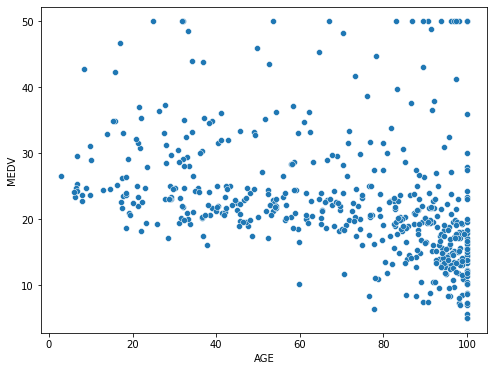

In [132]:
# 오래될 수록 저가 주택들이 몰려있는 것을 아래 차트를 통해 확인 할 수 있다.
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='AGE',y='MEDV')
plt.show()

In [146]:
# 주택 노후화 정도를 삼등분해보자
temp = df['AGE'].quantile(.33)
def func(x):
    if x <= df['AGE'].quantile(.33):
        return "new"
    elif x <= df['AGE'].quantile(.66):
        return "not-old"
    else :
        return "old"
df['AGE-ONE'] = df['AGE'].map(func)
df['AGE-ONE'].value_counts()

old        172
not-old    167
new        167
Name: AGE-ONE, dtype: int64

In [153]:
# 고급 주택은 비교적 새 주택 쪽에 몰려있는 것을 확인 할 수 있다.
df['CAT. MEDV'].groupby(df['AGE-ONE']).sum()

AGE-ONE
new        44
not-old    24
old        16
Name: CAT. MEDV, dtype: int64

#### 직주근접?

In [154]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,SIZE,AGE-ONE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,big,not-old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,small,not-old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,small,not-old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,small,new
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,small,new


In [158]:
corr['DIS']['MEDV']

0.249928734085904

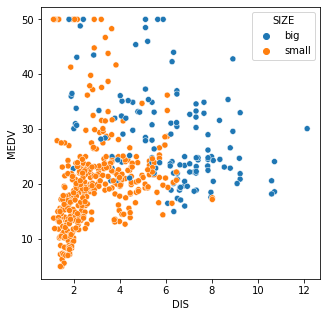

In [200]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x="DIS",y="MEDV",hue="SIZE")
plt.show()

직장과 주거지의 거리는 주택가격에 그리 큰 영향을 미치진 않는 것으로 파악되지만,  
대부분의 저가의 작은 주택들이 직주근접해있다는 점이 특기해볼만하다.

#### 찰스강뷰?

In [165]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,SIZE,AGE-ONE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,big,not-old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,small,not-old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,small,not-old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,small,new
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,small,new


In [179]:
corr['CHAS']['MEDV']

0.17526017719029868

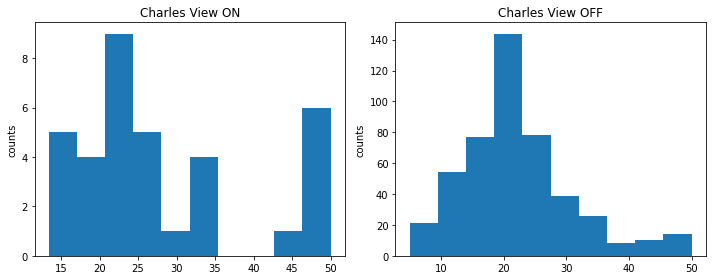

In [182]:
chas_o = df.loc[df["CHAS"]==1]# 찰스강뷰온
chas_x = df.loc[df["CHAS"]==0]# 찰스강뷰X

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Charles View ON')
plt.ylabel('counts')
plt.hist(chas_o['MEDV'])

plt.subplot(1,2,2)
plt.title('Charles View OFF')
plt.ylabel('counts')
plt.hist(chas_x['MEDV'])

plt.tight_layout()
plt.show()

찰스강뷰와 가격은 그다지 상관관계가 높지 않았았다.  

#### 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [191]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,SIZE,AGE-ONE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,big,not-old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,small,not-old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,small,not-old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,small,new
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,small,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,small,not-old
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,small,not-old
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,small,old
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,small,not-old


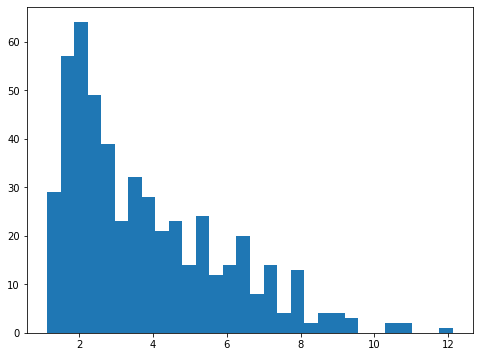

In [190]:
# 소형 평수 여부는 이전에 분류했던 SIZE 컬럼을 사용한다.(ZN == 0: small, ZM > 0: big)
# 직장 데이터를 차트로 그려보자
plt.figure(figsize=(8,6))
plt.hist(df['DIS'], bins=30)
plt.show()

In [197]:
df_small = df.loc[df['SIZE']=='small'] # 작은 평수 부동산
df_small


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,SIZE,AGE-ONE
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,small,not-old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,small,not-old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,small,new
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,small,new
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0,small,not-old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,small,not-old
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,small,not-old
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,small,old
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,small,not-old


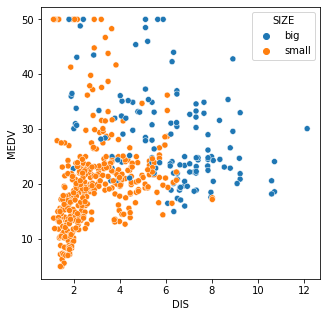

In [199]:
# 3번 직주근접 문제에서 확인한 차트이다.
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x="DIS",y="MEDV",hue="SIZE")
plt.show()

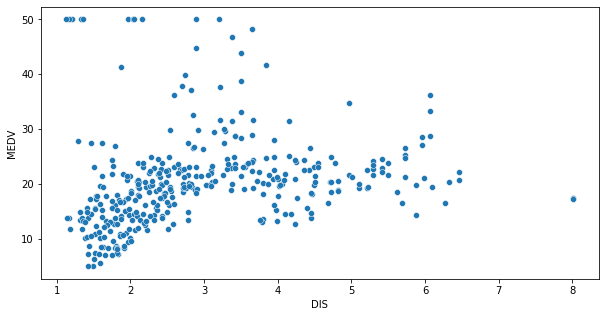

In [202]:
# 위 차트에서 small 주택만 확장한 차트가 아래이다.
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_small,x="DIS",y="MEDV")
plt.show()

In [205]:
corr_small = df_small.corr()
corr_small['MEDV']['DIS']

0.2207535785032989

In [210]:
# 직장이 가까운지 여부
close = df['DIS'].quantile(.2) # 상위 20% 등위 가까운 거리
df_close = df_small.loc[df['DIS']<close]


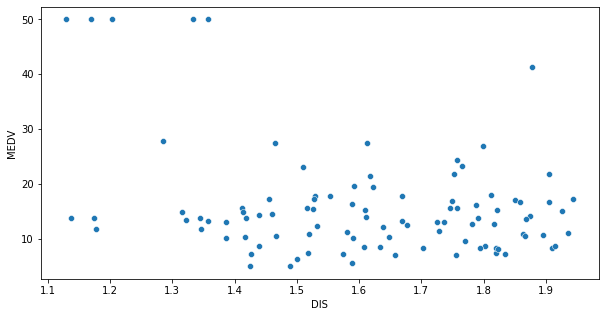

In [211]:
# small 주택 중 상위 20% 가까운 주택의 가격 차트
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_close,x="DIS",y="MEDV")
plt.show()

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>